tokenization
stop word remove
vectorization
nlp

In [1]:
import spacy
import torch
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/fake_reviews_dataset.csv', engine='python', on_bad_lines='skip')

In [3]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [4]:
display(df.head())

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


# **Task 1**

In [5]:
import spacy

# Load the English language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading en_core_web_sm model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Get the first review text
first_review_text = df['text_'].iloc[0]

# Process the text with spaCy
doc = nlp(first_review_text)

# Print the tokens
print("Original text:", first_review_text)
print("Tokens:")
for token in doc:
    print(f"- {token.text}")

Original text: Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty
Tokens:
- Love
- this
- !
-  
- Well
- made
- ,
- sturdy
- ,
- and
- very
- comfortable
- .
-  
- I
- love
- it!Very
- pretty


In [6]:
print(df.columns)

Index(['category', 'rating', 'label', 'text_'], dtype='object')


In [7]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [8]:
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['tokenized_text'] = df['text_'].apply(tokenize_text)

print("DataFrame with 'tokenized_text' column:")
display(df.head())

DataFrame with 'tokenized_text' column:


,category,rating,label,text_,tokenized_text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...","[Love, this, !, , Well, made, ,, sturdy, ,, a..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...","[love, it, ,, a, great, upgrade, from, the, or..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,"[This, pillow, saved, my, back, ., I, love, th..."
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...","[Missing, information, on, how, to, use, it, ,..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,"[Very, nice, set, ., Good, quality, ., We, hav..."


In [9]:
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in nlp.Defaults.stop_words and token.isalpha()]

df['text_without_stopwords'] = df['tokenized_text'].apply(remove_stopwords)

print("DataFrame with 'text_without_stopwords' column:")
display(df.head())

DataFrame with 'text_without_stopwords' column:


,category,rating,label,text_,tokenized_text,text_without_stopwords
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...","[Love, this, !, , Well, made, ,, sturdy, ,, a...","[Love, sturdy, comfortable, love, pretty]"
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...","[love, it, ,, a, great, upgrade, from, the, or...","[love, great, upgrade, original, couple, years]"
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,"[This, pillow, saved, my, back, ., I, love, th...","[pillow, saved, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...","[Missing, information, on, how, to, use, it, ,...","[Missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,"[Very, nice, set, ., Good, quality, ., We, hav...","[nice, set, Good, quality, set, months]"


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into strings for TF-IDF Vectorizer
df['text_joined'] = df['text_without_stopwords'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer with max_features=5000
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_joined'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF feature matrix:", tfidf_matrix.shape)

Shape of TF-IDF feature matrix: (40432, 5000)


In [11]:
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()
print("First 20 terms in the TF-IDF vocabulary:")
print(tfidf_vocabulary[:20])

First 20 terms in the TF-IDF vocabulary:
['aa' 'aaa' 'abilities' 'ability' 'able' 'abrupt' 'absolute' 'absolutely'
 'absorbent' 'abuse' 'abused' 'abusive' 'ac' 'academic' 'academy' 'accent'
 'accept' 'acceptable' 'access' 'accessible']


In [12]:
X = tfidf_matrix
y = df['category']

print("Shape of feature matrix X:", X.shape)
print("Number of unique categories in y:", y.nunique())

Shape of feature matrix X: (40432, 5000)
Number of unique categories in y: 10


In [13]:
X = X.toarray()
print("Shape of dense feature matrix X:", X.shape)

Shape of dense feature matrix X: (40432, 5000)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (28302, 5000)
Shape of X_test: (12130, 5000)
Shape of y_train: (28302,)
Shape of y_test: (12130,)


In [15]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Use 'liblinear' solver for multiclass classification on smaller datasets or 'lbfgs' for larger ones.
# Set max_iter for convergence and random_state for reproducibility.
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [16]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


Accuracy: 0.7663

Classification Report:
                              precision    recall  f1-score   support

                     Books_5       0.71      0.71      0.71      1337
Clothing_Shoes_and_Jewelry_5       0.78      0.83      0.81      1154
               Electronics_5       0.80      0.79      0.79      1156
          Home_and_Kitchen_5       0.68      0.71      0.70      1255
              Kindle_Store_5       0.75      0.77      0.76      1432
             Movies_and_TV_5       0.95      0.85      0.90      1124
              Pet_Supplies_5       0.91      0.83      0.87      1249
       Sports_and_Outdoors_5       0.64      0.60      0.62      1212
Tools_and_Home_Improvement_5       0.69      0.74      0.71      1074
            Toys_and_Games_5       0.80      0.84      0.82      1137

                    accuracy                           0.77     12130
                   macro avg       0.77      0.77      0.77     12130
                weighted avg       0.77      0.

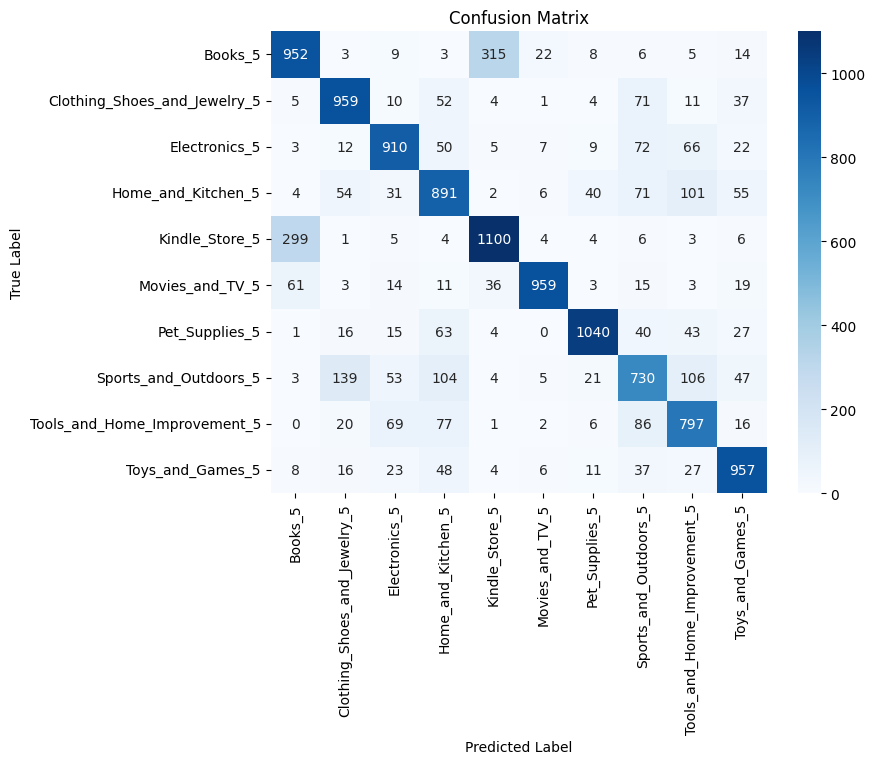

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels for better visualization
class_labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# **Task 2**

In [21]:
df['binary_label'] = df['label'].map({'CG': 1, 'OR': 0})
display(df.head())
print("Value counts for 'binary_label':")
print(df['binary_label'].value_counts())

,category,rating,label,text_,tokenized_text,text_without_stopwords,text_joined,binary_label
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...","[Love, this, !, , Well, made, ,, sturdy, ,, a...","[Love, sturdy, comfortable, love, pretty]",Love sturdy comfortable love pretty,1
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...","[love, it, ,, a, great, upgrade, from, the, or...","[love, great, upgrade, original, couple, years]",love great upgrade original couple years,1
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,"[This, pillow, saved, my, back, ., I, love, th...","[pillow, saved, love, look, feel, pillow]",pillow saved love look feel pillow,1
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...","[Missing, information, on, how, to, use, it, ,...","[Missing, information, use, great, product, pr...",Missing information use great product price,1
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,"[Very, nice, set, ., Good, quality, ., We, hav...","[nice, set, Good, quality, set, months]",nice set Good quality set months,1


Value counts for 'binary_label':
binary_label
1    20216
0    20216
Name: count, dtype: int64


In [22]:
categorical_fake_reviews = df.groupby(['category', 'binary_label']).size().unstack(fill_value=0)
display(categorical_fake_reviews)
print("0: Genuine Review, 1: Fake Review")

binary_label,0,1
category,,
Books_5,2185,2185
Clothing_Shoes_and_Jewelry_5,1924,1924
Electronics_5,1994,1994
Home_and_Kitchen_5,2028,2028
Kindle_Store_5,2365,2365
Movies_and_TV_5,1794,1794
Pet_Supplies_5,2127,2127
Sports_and_Outdoors_5,1973,1973
Tools_and_Home_Improvement_5,1929,1929


0: Genuine Review, 1: Fake Review


In [27]:
import pandas as pd

# 1. Extract coefficients from the trained binary_model
# For binary classification, coef_ will be a 2D array (1, n_features). We need the first (and only) row.
coefficients = binary_model.coef_[0]

# 2. Create a Pandas Series mapping words to their coefficients
# Ensure that the length of coefficients matches the length of tfidf_vocabulary
if len(coefficients) == len(tfidf_vocabulary):
    feature_importance = pd.Series(coefficients, index=tfidf_vocabulary)
else:
    raise ValueError("Mismatch between coefficients and vocabulary size.")

# 3. Sort the Series in descending order to get the most influential words for the positive class (fake review = 1)
top_influential_words = feature_importance.sort_values(ascending=False)

# 4. Display the top N (e.g., 20) words with the highest positive coefficients
N = 20
print(f"Top {N} most influential words for fake reviews (binary_label = 1):")
print(top_influential_words.head(N))

Top 20 most influential words for fake reviews (binary_label = 1):
reason          6.584519
problem         6.480903
couple          5.659507
wide            5.640476
replace         5.219287
admit           5.152514
lot             4.712742
materials       4.462792
downside        4.400977
plastic         4.212964
developed       4.122925
fact            3.719388
fan             3.640690
pieces          3.629583
friend          3.517332
strong          3.470579
characters      3.305721
addition        3.261009
bit             3.217938
instructions    3.193318
dtype: float64


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare data for binary classification
y_binary = df['binary_label']

# Split the data into training and testing sets for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model for binary classification
binary_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
binary_model.fit(X_train_binary, y_train_binary)

print("Binary Logistic Regression model trained successfully.")

Binary Logistic Regression model trained successfully.


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the binary test set
y_pred_binary = binary_model.predict(X_test_binary)

# Evaluate the binary classification model
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_report = classification_report(y_test_binary, y_pred_binary)
binary_cm = confusion_matrix(y_test_binary, y_pred_binary)

print(f"Binary Classification Accuracy: {binary_accuracy:.4f}")
print("\nBinary Classification Report:")
print(binary_report)

Binary Classification Accuracy: 0.8539

Binary Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6064
           1       0.87      0.84      0.85      6066

    accuracy                           0.85     12130
   macro avg       0.85      0.85      0.85     12130
weighted avg       0.85      0.85      0.85     12130



# **Task 3**

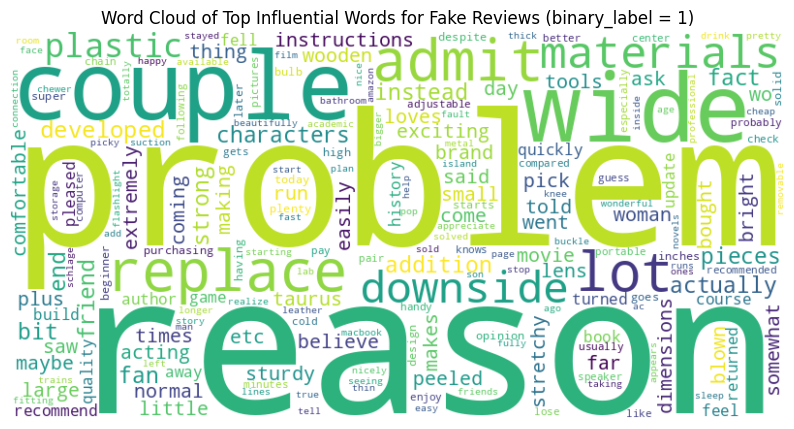

Word cloud generated successfully.


In [28]:
try:
    from wordcloud import WordCloud
except ImportError:
    print("Installing wordcloud library...")
    %pip install wordcloud
    from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Convert the top_influential_words Series into a dictionary with absolute coefficient values
# This is because coefficients can be negative, but word cloud needs positive frequencies.
word_freq = {word: abs(score) for word, score in top_influential_words.items()}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate_from_frequencies(word_freq)

# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Influential Words for Fake Reviews (binary_label = 1)')
plt.show()

print("Word cloud generated successfully.")